## Clustering NBA Players by position with per game stats
The purpose of this notebook is identify the play style of each player inside the traditional basketball positions. We
will three different clustering algorithm to evaluate which ones is the best option. The algorithm that are going to be
tested are:
* **K-means**. The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing
a criterion known as the inertia or within-cluster sum-of-squares.
* **DBSCAN**. The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to
this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters
are convex shaped.
* **OPTICS**. The OPTICS algorithm shares many similarities with the DBSCAN algorithm, and can be considered a
generalization of DBSCAN that relaxes the eps requirement from a single value to a value range. The key difference
between DBSCAN and OPTICS is that the OPTICS algorithm builds a reachability graph, which assigns each sample both a
reachability_ distance, and a spot within the cluster ordering_ attribute.

In [61]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, OPTICS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Loading data
The first step is load players data. It is necessary to split the original data set into five subsets, one for each
position.
We will run the clustering algorithm with different stats, and evaluate the performance by each one:
* Per game stats.
* Advanced stats.
* Per game and advanced stats.

In [62]:
players_data = pd.read_csv('PlayersAdvStats.csv')
players_data

,player_id,first_name,last_name,position,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,Kyle,Korver,SG,1838.73,9.54,3.46,4.54,8.00,1.88,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
1,200757,Thabo,Sefolosha,SF,1474.87,7.00,2.84,2.68,5.51,0.54,...,0.56,0.23,0.10,3.59,18.08,1.71,13.48,8.94,2.94,12.98
2,200794,Paul,Millsap,PF,1974.79,18.41,6.48,6.71,13.19,0.83,...,0.52,0.45,0.06,8.93,21.26,3.25,12.42,17.86,2.92,24.89
3,201143,Al,Horford,C,1891.21,15.39,6.56,6.61,13.16,0.95,...,0.53,0.13,0.07,8.16,18.44,3.86,8.70,16.17,1.28,21.97
4,201168,Tiago,Splitter,C,962.67,5.40,2.23,2.27,4.50,0.00,...,0.50,0.25,0.00,9.68,13.10,1.87,12.79,8.59,1.85,16.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,202689,Kemba,Walker,PG,2125.24,20.76,7.26,9.29,16.55,1.86,...,0.49,0.31,0.11,2.49,12.39,1.54,10.74,31.75,2.51,31.36
279,203087,Jeremy,Lamb,SF,1298.87,10.92,4.34,4.92,9.26,1.00,...,0.52,0.17,0.11,4.37,21.19,1.75,8.24,13.47,1.52,26.49
280,203469,Cody,Zeller,C,1525.29,9.11,3.26,3.26,6.53,0.00,...,0.50,0.54,0.00,7.91,19.85,2.46,10.50,6.72,1.83,18.74
281,203798,PJ,Hariston,SF,1178.90,6.44,2.23,3.79,6.03,1.21,...,0.47,0.15,0.20,2.20,15.76,0.66,6.71,5.58,1.36,18.48


In [63]:
point_guards_data = players_data[players_data['position'] == 'PG']
del point_guards_data['position']
del point_guards_data['team_id']
point_guards_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,201952,Jeff,Teague,1718.38,14.68,5.03,7.12,12.15,1.12,2.85,...,0.46,0.34,0.09,1.93,8.35,0.93,16.19,30.86,2.29,26.47
8,203471,Dennis,Schroder,1287.78,10.66,4.05,5.76,9.80,1.02,3.15,...,0.47,0.20,0.10,2.25,11.90,0.46,16.29,35.78,2.56,26.95
14,202738,Isaiah,Thomas,1970.10,21.52,6.98,9.71,16.69,1.98,5.98,...,0.48,0.38,0.12,1.77,7.96,0.17,12.05,35.24,1.75,29.28
21,2590,Mo,Williams,1390.27,10.35,3.96,4.88,8.85,1.04,3.04,...,0.51,0.17,0.12,0.77,10.97,0.57,15.95,25.16,0.81,22.96
26,203521,Matthew,Dellavedova,1623.13,8.47,3.10,3.97,7.08,1.40,3.10,...,0.54,0.14,0.20,2.16,7.89,0.42,15.67,27.95,1.53,15.45
31,201950,Jrue,Holiday,1503.72,13.64,5.06,6.47,11.53,1.22,3.17,...,0.49,0.25,0.11,1.41,11.89,1.21,14.15,45.11,2.35,32.61
34,202397,Ish,Smith,1336.46,8.62,3.50,4.50,8.00,0.39,1.23,...,0.46,0.19,0.05,2.59,16.35,0.87,16.32,49.57,2.01,25.50
37,2550,Kirk,Hinrich,930.88,4.19,1.46,1.96,3.42,0.69,1.61,...,0.53,0.18,0.20,1.08,7.98,0.18,17.24,14.97,1.43,12.38
39,201166,Aaron,Brooks,973.63,7.63,2.87,4.10,6.97,1.13,2.90,...,0.49,0.14,0.16,2.90,8.01,0.76,11.56,23.12,0.75,22.16
40,201565,Derrick,Rose,1916.26,15.71,6.46,9.49,15.94,0.66,2.37,...,0.43,0.17,0.04,1.75,8.20,0.66,13.67,24.37,0.98,26.74


In [64]:
shooting_guards_data = players_data[players_data['position'] == 'SG']
del shooting_guards_data['position']
shooting_guards_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
0,2594,Kyle,Korver,1838.73,9.54,3.46,4.54,8.00,1.88,5.00,...,0.55,0.11,0.23,0.65,12.82,1.24,14.66,10.31,1.25,14.56
12,202323,Evan,Turner,1600.17,9.19,3.74,5.02,8.76,0.21,1.45,...,0.44,0.20,0.02,2.47,16.52,0.93,18.00,22.99,1.74,18.96
13,202340,Avery,Bradley,1963.40,14.76,5.78,7.43,13.22,1.95,5.43,...,0.51,0.12,0.15,2.11,6.68,0.66,9.48,10.12,2.41,20.44
18,203935,Marcus,Smart,1634.77,8.50,2.96,6.04,9.00,0.77,3.82,...,0.37,0.29,0.09,5.85,12.20,1.06,10.78,16.92,2.99,18.15
22,2747,J.R.,Smith,1758.54,12.11,4.51,6.51,11.03,2.34,6.20,...,0.52,0.11,0.21,2.62,8.81,0.75,6.26,8.97,1.90,19.75
27,201569,Eric,Gordon,2013.85,14.88,5.00,7.22,12.22,2.50,6.60,...,0.51,0.22,0.20,0.86,7.05,0.75,10.52,15.78,1.54,24.44
43,202710,Jimmy,Butler,2249.60,22.07,7.28,9.05,16.32,1.02,3.45,...,0.48,0.48,0.06,3.18,10.66,1.53,9.29,18.25,2.37,25.01
44,202734,E'Twaun,Moore,867.17,4.21,1.76,2.10,3.86,0.31,0.93,...,0.50,0.17,0.08,1.29,9.54,0.71,11.73,8.22,1.75,14.00
57,200751,Randy,Foye,1195.74,6.02,2.16,4.23,6.39,0.88,3.21,...,0.41,0.15,0.14,1.84,8.85,1.11,14.07,16.30,1.32,18.21
61,203115,Will,Barton,1725.61,15.28,5.56,7.05,12.61,1.60,4.26,...,0.50,0.24,0.13,3.55,21.27,1.19,10.33,15.43,1.70,24.70


In [65]:
small_fordwards_data = players_data[players_data['position'] == 'SF']
del small_fordwards_data['position']
small_fordwards_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
1,200757,Thabo,Sefolosha,1474.87,7.00,2.84,2.68,5.51,0.54,1.81,...,0.56,0.23,0.10,3.59,18.08,1.71,13.48,8.94,2.94,12.98
7,203145,Kent,Bazemore,1707.05,12.97,4.66,5.42,10.08,1.71,4.05,...,0.55,0.23,0.17,1.08,16.66,1.36,13.19,13.39,2.37,20.40
16,203109,Jae,Crowder,1929.05,14.12,4.86,5.95,10.81,1.67,4.67,...,0.53,0.31,0.15,3.62,14.12,1.42,10.42,8.36,3.00,18.53
19,2210,Richard,Jefferson,1170.16,6.03,2.13,2.62,4.76,0.97,2.51,...,0.55,0.28,0.20,0.97,7.55,1.06,11.61,6.91,1.35,14.58
20,2544,LeBron,James,2112.03,25.16,9.53,9.55,19.08,1.16,3.95,...,0.53,0.37,0.06,4.01,20.02,1.79,13.02,36.22,2.27,33.97
32,201967,Dante,Cunningham,1197.60,4.33,1.68,2.12,3.80,0.65,1.82,...,0.53,0.13,0.17,3.18,16.29,1.68,6.94,4.79,1.26,11.85
33,202087,Alonzo,Gee,1236.86,4.05,1.64,1.59,3.24,0.26,0.88,...,0.55,0.18,0.08,4.40,15.16,0.77,16.48,8.18,2.02,11.13
45,203503,Tony,Snell,1352.79,5.71,2.13,3.68,5.82,1.03,2.87,...,0.45,0.08,0.18,1.39,13.54,0.95,13.59,6.21,0.79,13.30
46,203926,Doug,McDermott,1262.10,7.13,2.77,3.72,6.49,1.26,2.95,...,0.52,0.06,0.19,2.25,8.80,0.36,9.41,5.19,0.38,15.05
54,202083,Wesley,Matthews,1983.36,13.00,4.41,7.03,11.44,2.51,7.08,...,0.50,0.17,0.22,1.61,10.14,0.78,8.24,9.99,1.78,20.53


In [66]:
power_fordwards_data = players_data[players_data['position'] == 'PF']
del power_fordwards_data['position']
power_fordwards_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
2,200794,Paul,Millsap,1974.79,18.41,6.48,6.71,13.19,0.83,2.74,...,0.52,0.45,0.06,8.93,21.26,3.25,12.42,17.86,2.92,24.89
6,203118,Mike,Scott,849.30,6.95,2.70,2.46,5.16,0.84,2.03,...,0.60,0.17,0.16,4.23,12.90,1.25,9.67,11.75,0.90,19.75
9,101135,David,Lee,942.28,7.31,2.97,3.48,6.45,0.00,0.03,...,0.46,0.27,0.00,9.34,21.17,2.10,14.67,18.30,1.24,23.41
10,101161,Amir,Johnson,1463.62,8.28,3.64,2.54,6.18,0.23,0.85,...,0.61,0.23,0.04,9.28,18.64,3.69,15.84,10.36,1.35,14.41
11,201973,Jonas,Jerebko,803.39,3.54,1.22,1.93,3.15,0.49,1.07,...,0.47,0.25,0.16,6.20,17.16,0.87,15.38,9.40,0.84,13.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,203210,JaMychal,Green,945.08,6.10,2.33,2.27,4.60,0.23,0.40,...,0.53,0.35,0.05,9.29,23.32,1.85,16.53,4.50,1.21,20.14
256,2743,Kris,Humphries,1025.89,6.67,2.37,3.44,5.82,0.85,2.44,...,0.48,0.20,0.15,6.49,22.61,2.55,10.49,5.30,0.34,18.56
258,201162,Jared,Dudley,1712.03,8.44,3.03,3.31,6.33,1.49,3.18,...,0.60,0.19,0.23,2.69,12.72,0.38,10.99,9.42,1.77,12.13
267,101141,Ersan,Illyasova,1709.67,11.12,4.12,5.64,9.76,1.48,4.17,...,0.50,0.20,0.15,6.96,14.77,1.55,9.88,7.10,1.34,18.78


In [67]:
centers_data = players_data[players_data['position'] == 'C']
del centers_data['position']
centers_data

,player_id,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
3,201143,Al,Horford,1891.21,15.39,6.56,6.61,13.16,0.95,2.95,...,0.53,0.13,0.07,8.16,18.44,3.86,8.70,16.17,1.28,21.97
4,201168,Tiago,Splitter,962.67,5.40,2.23,2.27,4.50,0.00,0.07,...,0.50,0.25,0.00,9.68,13.10,1.87,12.79,8.59,1.85,16.24
17,203482,Kelly,Olynyk,1270.49,9.83,3.76,4.54,8.29,1.34,3.07,...,0.53,0.18,0.16,5.88,17.62,2.57,12.00,11.87,2.24,20.85
24,202389,Timofey,Mozgov,1075.53,6.44,2.64,2.50,5.14,0.03,0.17,...,0.52,0.29,0.01,9.40,18.50,3.70,14.73,3.59,0.84,17.78
25,202684,Tristan,Thompson,1621.67,7.23,2.82,2.15,4.97,0.00,0.00,...,0.57,0.54,0.00,13.39,25.84,1.30,9.43,3.96,0.67,11.81
28,201582,Alexis,Ajinca,743.46,4.97,2.21,2.00,4.21,0.00,0.03,...,0.53,0.14,0.00,11.01,29.33,3.48,10.34,7.64,1.17,22.01
30,201600,Omer,Asik,1012.77,3.40,1.17,1.20,2.37,0.00,0.00,...,0.49,0.70,0.00,11.73,27.14,1.99,24.39,4.02,0.90,13.30
35,203076,Anthony,Davis,2139.27,23.49,8.84,9.05,17.89,0.51,1.76,...,0.51,0.39,0.03,6.56,29.57,5.97,9.04,12.55,1.93,35.36
38,201149,Joakim,Noah,1287.52,4.37,1.78,2.74,4.52,0.00,0.04,...,0.39,0.35,0.00,15.17,25.58,3.44,23.38,24.42,1.26,13.66
48,2585,Zaza,Pachulia,1802.17,10.51,3.58,3.63,7.22,0.00,0.05,...,0.50,0.59,0.00,14.44,27.98,1.03,17.49,11.37,1.77,18.61


### K-Means
The first model to be evaluated is K-Means. For these algorithm we need to find the optimal number of clusters, we will
use the elbow method.
1. Clustering point guards with per game and advanced stats. First we need to scale the data to a similar scale to avoid
give more importance to larger features.

In [68]:
X_unscaled = point_guards_data.drop(['player_id', 'first_name', 'last_name'], 1)
scaler = StandardScaler()
scaler.fit(X_unscaled)
X = scaler.transform(X_unscaled)

When we have the input data scaled we need to run K-Means with different clusters numbers and print the elbow curve to
identify the optimal value of clusters' numbers.

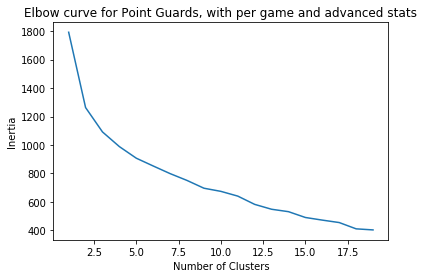

In [69]:
cluster_number = range(1, 20)
pg_kmeans_models = [KMeans(n_clusters=i) for i in cluster_number]
pg_inertia = [pg_kmeans_models[i].fit(X).inertia_ for i in range(len(pg_kmeans_models))]
plt.plot(cluster_number, pg_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with per game and advanced stats')
plt.savefig('Figures/PG/kmeans-full.png')
plt.show()

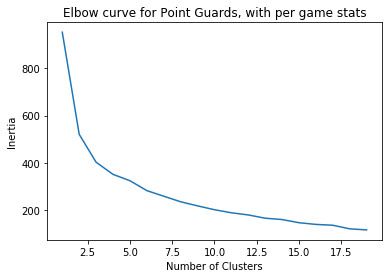

In [70]:
X_per_game_unscaled = point_guards_data.copy()
X_per_game_unscaled = X_per_game_unscaled.drop(['player_id', 'first_name', 'last_name', 'OffRtg', 'Floor%', 'DefRtg',
                                                'NetRtg', 'TS%', 'eFG%', 'FTARate', '3FGARate', 'OR%', 'DR%', 'BLK%',
                                                'TOV%', 'AST%', 'STL%', 'USG%'], 1)
scaler_per_game = StandardScaler()
scaler_per_game.fit(X_per_game_unscaled)
X_per_game = scaler_per_game.transform(X_per_game_unscaled)

pg_kmeans_models_per_game = [KMeans(n_clusters=i) for i in cluster_number]
pg_inertia_per_game = [pg_kmeans_models_per_game[i].fit(X_per_game).inertia_ for i in range(len(pg_kmeans_models_per_game))]
plt.plot(cluster_number, pg_inertia_per_game)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with per game stats')
plt.savefig('Figures/PG/kmeans-per-game.png')
plt.show()

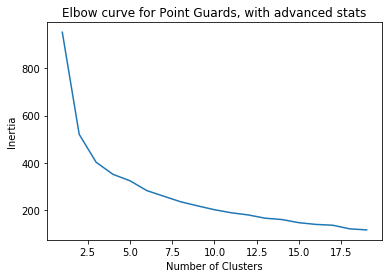

In [71]:
X_advanced_unscaled = point_guards_data.copy()
X_advanced_unscaled = X_advanced_unscaled.drop(['player_id', 'first_name', 'last_name', 'played_minutes_per_game',
                                                'scored_points_per_game', 'field_goals_made_per_game',
                                                'field_goals_miss_per_game', 'field_goals_attempts_per_game',
                                                'three_points_field_goals_made_per_game',
                                                'three_points_field_goals_attempts_per_game',
                                                'free_throws_made_per_game', 'free_throws_miss_per_game',
                                                'free_throws_attempts_per_game', 'assists_per_game',
                                                'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
                                                'steals_per_game', 'blocks_per_game', 'turnovers_per_game',
                                                'personal_fouls_per_game'], 1)
scaler_advanced = StandardScaler()
scaler_advanced.fit(X_advanced_unscaled)
X_advanced = scaler_advanced.transform(X_advanced_unscaled)

pg_kmeans_models_advanced = [KMeans(n_clusters=i) for i in cluster_number]
pg_inertia_advanced = [pg_kmeans_models_per_game[i].fit(X_advanced).inertia_ for i in range(len(pg_kmeans_models_advanced))]
plt.plot(cluster_number, pg_inertia_per_game)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Point Guards, with advanced stats')
plt.savefig('Figures/PG/kmeans-advanced.png')
plt.show()

Analyzing the elbow curves we can conclude:
* For all statistics input the best number of clusters is 6.
* For per game statistics input the best number of clusters is 7.
* For advanced statistics input the best number of clusters is 6.

Now we build the models and compute the clusters and the analyze the cluster to evaluate which player aggrupation is
more logical.

In [72]:
KMeans_pg_full = KMeans(n_clusters=5, n_init=20).fit(X)
pg_full_predicted_classes = KMeans_pg_full.predict(X)

pg_full = point_guards_data.copy()
pg_full.insert(1, 'Cluster', pg_full_predicted_classes)
pg_full

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,201952,2,Jeff,Teague,1718.38,14.68,5.03,7.12,12.15,1.12,...,0.46,0.34,0.09,1.93,8.35,0.93,16.19,30.86,2.29,26.47
8,203471,2,Dennis,Schroder,1287.78,10.66,4.05,5.76,9.80,1.02,...,0.47,0.20,0.10,2.25,11.90,0.46,16.29,35.78,2.56,26.95
14,202738,1,Isaiah,Thomas,1970.10,21.52,6.98,9.71,16.69,1.98,...,0.48,0.38,0.12,1.77,7.96,0.17,12.05,35.24,1.75,29.28
21,2590,2,Mo,Williams,1390.27,10.35,3.96,4.88,8.85,1.04,...,0.51,0.17,0.12,0.77,10.97,0.57,15.95,25.16,0.81,22.96
26,203521,0,Matthew,Dellavedova,1623.13,8.47,3.10,3.97,7.08,1.40,...,0.54,0.14,0.20,2.16,7.89,0.42,15.67,27.95,1.53,15.45
31,201950,2,Jrue,Holiday,1503.72,13.64,5.06,6.47,11.53,1.22,...,0.49,0.25,0.11,1.41,11.89,1.21,14.15,45.11,2.35,32.61
34,202397,2,Ish,Smith,1336.46,8.62,3.50,4.50,8.00,0.39,...,0.46,0.19,0.05,2.59,16.35,0.87,16.32,49.57,2.01,25.50
37,2550,4,Kirk,Hinrich,930.88,4.19,1.46,1.96,3.42,0.69,...,0.53,0.18,0.20,1.08,7.98,0.18,17.24,14.97,1.43,12.38
39,201166,0,Aaron,Brooks,973.63,7.63,2.87,4.10,6.97,1.13,...,0.49,0.14,0.16,2.90,8.01,0.76,11.56,23.12,0.75,22.16
40,201565,2,Derrick,Rose,1916.26,15.71,6.46,9.49,15.94,0.66,...,0.43,0.17,0.04,1.75,8.20,0.66,13.67,24.37,0.98,26.74


In [73]:
pg_full_cluster_size = pd.DataFrame()
pg_full_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
pg_full_cluster_size['Players'] = pg_full.groupby('Cluster').size()
pg_full_cluster_size

,Cluster,Players
0,0,12
1,1,10
2,2,21
3,3,4
4,4,9


In [74]:
KMeans_pg_per_game = KMeans(n_clusters=5, n_init=20).fit(X_per_game)
pg_per_game_predicted_classes = KMeans_pg_per_game.predict(X_per_game)

pg_per_game = point_guards_data.copy()
pg_per_game.insert(1, 'Cluster', pg_per_game_predicted_classes)
pg_per_game

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,201952,3,Jeff,Teague,1718.38,14.68,5.03,7.12,12.15,1.12,...,0.46,0.34,0.09,1.93,8.35,0.93,16.19,30.86,2.29,26.47
8,203471,1,Dennis,Schroder,1287.78,10.66,4.05,5.76,9.80,1.02,...,0.47,0.20,0.10,2.25,11.90,0.46,16.29,35.78,2.56,26.95
14,202738,0,Isaiah,Thomas,1970.10,21.52,6.98,9.71,16.69,1.98,...,0.48,0.38,0.12,1.77,7.96,0.17,12.05,35.24,1.75,29.28
21,2590,1,Mo,Williams,1390.27,10.35,3.96,4.88,8.85,1.04,...,0.51,0.17,0.12,0.77,10.97,0.57,15.95,25.16,0.81,22.96
26,203521,1,Matthew,Dellavedova,1623.13,8.47,3.10,3.97,7.08,1.40,...,0.54,0.14,0.20,2.16,7.89,0.42,15.67,27.95,1.53,15.45
31,201950,3,Jrue,Holiday,1503.72,13.64,5.06,6.47,11.53,1.22,...,0.49,0.25,0.11,1.41,11.89,1.21,14.15,45.11,2.35,32.61
34,202397,1,Ish,Smith,1336.46,8.62,3.50,4.50,8.00,0.39,...,0.46,0.19,0.05,2.59,16.35,0.87,16.32,49.57,2.01,25.50
37,2550,4,Kirk,Hinrich,930.88,4.19,1.46,1.96,3.42,0.69,...,0.53,0.18,0.20,1.08,7.98,0.18,17.24,14.97,1.43,12.38
39,201166,4,Aaron,Brooks,973.63,7.63,2.87,4.10,6.97,1.13,...,0.49,0.14,0.16,2.90,8.01,0.76,11.56,23.12,0.75,22.16
40,201565,3,Derrick,Rose,1916.26,15.71,6.46,9.49,15.94,0.66,...,0.43,0.17,0.04,1.75,8.20,0.66,13.67,24.37,0.98,26.74


In [75]:
pg_per_game_cluster_size = pd.DataFrame()
pg_per_game_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
pg_per_game_cluster_size['Players'] = pg_per_game.groupby('Cluster').size()
pg_per_game_cluster_size

,Cluster,Players
0,0,9
1,1,20
2,2,4
3,3,12
4,4,11


In [76]:
KMeans_pg_advanced = KMeans(n_clusters=5, n_init=20).fit(X_advanced)
pg_advanced_predicted_classes = KMeans_pg_advanced.predict(X_advanced)

pg_advanced = point_guards_data.copy()
pg_advanced.insert(1, 'Cluster', pg_advanced_predicted_classes)
pg_advanced

,player_id,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,201952,1,Jeff,Teague,1718.38,14.68,5.03,7.12,12.15,1.12,...,0.46,0.34,0.09,1.93,8.35,0.93,16.19,30.86,2.29,26.47
8,203471,1,Dennis,Schroder,1287.78,10.66,4.05,5.76,9.80,1.02,...,0.47,0.20,0.10,2.25,11.90,0.46,16.29,35.78,2.56,26.95
14,202738,3,Isaiah,Thomas,1970.10,21.52,6.98,9.71,16.69,1.98,...,0.48,0.38,0.12,1.77,7.96,0.17,12.05,35.24,1.75,29.28
21,2590,1,Mo,Williams,1390.27,10.35,3.96,4.88,8.85,1.04,...,0.51,0.17,0.12,0.77,10.97,0.57,15.95,25.16,0.81,22.96
26,203521,4,Matthew,Dellavedova,1623.13,8.47,3.10,3.97,7.08,1.40,...,0.54,0.14,0.20,2.16,7.89,0.42,15.67,27.95,1.53,15.45
31,201950,0,Jrue,Holiday,1503.72,13.64,5.06,6.47,11.53,1.22,...,0.49,0.25,0.11,1.41,11.89,1.21,14.15,45.11,2.35,32.61
34,202397,0,Ish,Smith,1336.46,8.62,3.50,4.50,8.00,0.39,...,0.46,0.19,0.05,2.59,16.35,0.87,16.32,49.57,2.01,25.50
37,2550,4,Kirk,Hinrich,930.88,4.19,1.46,1.96,3.42,0.69,...,0.53,0.18,0.20,1.08,7.98,0.18,17.24,14.97,1.43,12.38
39,201166,4,Aaron,Brooks,973.63,7.63,2.87,4.10,6.97,1.13,...,0.49,0.14,0.16,2.90,8.01,0.76,11.56,23.12,0.75,22.16
40,201565,1,Derrick,Rose,1916.26,15.71,6.46,9.49,15.94,0.66,...,0.43,0.17,0.04,1.75,8.20,0.66,13.67,24.37,0.98,26.74


In [77]:
pg_advanced_cluster_size = pd.DataFrame()
pg_advanced_cluster_size['Cluster'] = [0, 1, 2, 3, 4]
pg_advanced_cluster_size['Players'] = pg_advanced.groupby('Cluster').size()
pg_advanced_cluster_size


,Cluster,Players
0,0,6
1,1,20
2,2,5
3,3,11
4,4,14


Now we are going to extract the mean stats for each cluster.

In [78]:
pg_full['played_minutes_per_game'] = pg_full['played_minutes_per_game'].apply(lambda sec: sec/60)

In [84]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster0 = pg_full[pg_full['Cluster'] == 0]
pg_full_cluster0 = pg_full_cluster0.drop(['player_id'], 1)
pg_full_cluster0

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
26,0,Matthew,Dellavedova,27.05,8.47,3.10,3.97,7.08,1.40,3.10,...,0.54,0.14,0.20,2.16,7.89,0.42,15.67,27.95,1.53,15.45
39,0,Aaron,Brooks,16.23,7.63,2.87,4.10,6.97,1.13,2.90,...,0.49,0.14,0.16,2.90,8.01,0.76,11.56,23.12,0.75,22.16
49,0,Devin,Harris,20.03,7.57,2.68,3.11,5.78,0.70,2.08,...,0.52,0.38,0.12,2.02,10.58,0.91,11.99,19.40,2.66,19.42
67,0,Shaun,Livingston,19.96,6.21,2.69,2.46,5.15,0.03,0.28,...,0.52,0.16,0.00,3.85,6.56,1.04,13.28,21.18,1.34,14.22
82,0,Patrick,Beverly,25.83,9.09,3.27,4.39,7.67,1.79,4.06,...,0.54,0.14,0.23,2.84,8.71,0.91,14.06,15.88,2.39,16.27
141,0,Jose,Calderon,28.27,7.49,2.84,3.18,6.02,1.18,2.82,...,0.57,0.12,0.20,1.57,10.62,0.31,15.17,21.23,1.91,11.98
148,0,Langston,Galloway,23.36,7.47,2.71,3.76,6.47,0.93,2.47,...,0.49,0.22,0.14,2.23,13.27,0.75,8.86,14.11,1.79,15.09
165,0,George,Hill,34.84,13.03,4.80,5.83,10.63,1.97,4.46,...,0.54,0.19,0.19,2.44,10.10,0.61,11.44,14.43,2.10,16.57
180,0,Ronnie,Price,14.93,4.33,1.42,2.27,3.70,0.97,2.52,...,0.52,0.16,0.26,2.31,6.55,0.88,15.55,17.29,3.76,13.64
203,0,Darren,Collison,28.41,12.91,4.77,5.66,10.43,1.14,3.06,...,0.51,0.26,0.11,1.59,6.80,0.00,13.97,22.73,1.62,20.14


In [85]:
pg_full_cluster0.mean()

Cluster                                        0.00
played_minutes_per_game                       23.87
scored_points_per_game                         8.73
field_goals_made_per_game                      3.29
field_goals_miss_per_game                      3.95
field_goals_attempts_per_game                  7.25
three_points_field_goals_made_per_game         1.08
three_points_field_goals_attempts_per_game     2.69
free_throws_made_per_game                      1.07
free_throws_miss_per_game                      0.29
free_throws_attempts_per_game                  1.35
assists_per_game                               3.15
offensive_rebounds_per_game                    0.45
defensive_rebounds_per_game                    1.95
steals_per_game                                0.89
blocks_per_game                                0.17
turnovers_per_game                             1.15
personal_fouls_per_game                        2.01
OffRtg                                       127.40
Floor%      

With the information of the Cluster 0 showed above we can determinate that the point guards in this cluster are starter
or important role players that plays over 22 minutes per game. They are good defenders and they have good play vision
that allow their to assists.

In [86]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster1 = pg_full[pg_full['Cluster'] == 1]
pg_full_cluster1 = pg_full_cluster1.drop(['player_id'], 1)
pg_full_cluster1

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
14,1,Isaiah,Thomas,32.83,21.52,6.98,9.71,16.69,1.98,5.98,...,0.48,0.38,0.12,1.77,7.96,0.17,12.05,35.24,1.75,29.28
71,1,Stephen,Curry,33.63,30.02,9.90,9.55,19.45,4.83,10.70,...,0.63,0.30,0.25,2.76,13.82,0.33,13.53,35.54,3.11,33.78
89,1,Chris,Paul,32.46,18.29,6.57,8.09,14.66,1.43,3.71,...,0.50,0.29,0.10,2.11,10.81,0.36,14.37,50.11,3.38,26.65
182,1,Eric,Bledsoe,34.08,20.63,7.30,8.70,16.00,1.60,4.23,...,0.51,0.34,0.10,1.89,11.73,1.61,16.35,31.72,3.17,28.13
192,1,Damian,Lillard,36.04,24.84,8.55,11.45,20.00,3.13,8.16,...,0.51,0.26,0.16,2.06,11.91,0.73,13.11,37.86,1.40,33.26
220,1,Russell,Westbrook,33.43,24.14,8.43,10.09,18.52,1.18,4.14,...,0.49,0.40,0.06,5.94,17.39,0.63,16.39,51.09,3.87,34.64
229,1,Kyle,Lowry,36.14,20.64,6.62,8.98,15.60,2.74,7.09,...,0.51,0.34,0.18,2.11,13.52,1.32,14.44,31.78,3.44,26.65
261,1,John,Wall,35.52,19.52,7.38,9.72,17.10,1.48,4.25,...,0.47,0.25,0.09,2.11,11.91,1.71,18.57,46.07,2.95,29.46
269,1,Reggie,Jackson,30.25,19.09,7.02,9.31,16.33,1.41,4.09,...,0.47,0.26,0.09,2.79,11.91,0.18,13.77,42.51,1.47,31.60
278,1,Kemba,Walker,35.42,20.76,7.26,9.29,16.55,1.86,4.91,...,0.49,0.31,0.11,2.49,12.39,1.54,10.74,31.75,2.51,31.36


In [87]:
pg_full_cluster1.mean()

Cluster                                        1.00
played_minutes_per_game                       33.98
scored_points_per_game                        21.95
field_goals_made_per_game                      7.60
field_goals_miss_per_game                      9.49
field_goals_attempts_per_game                 17.09
three_points_field_goals_made_per_game         2.16
three_points_field_goals_attempts_per_game     5.73
free_throws_made_per_game                      4.58
free_throws_miss_per_game                      0.76
free_throws_attempts_per_game                  5.35
assists_per_game                               7.37
offensive_rebounds_per_game                    0.77
defensive_rebounds_per_game                    3.71
steals_per_game                                1.78
blocks_per_game                                0.36
turnovers_per_game                             3.26
personal_fouls_per_game                        2.33
OffRtg                                       125.04
Floor%      

For the cluster 1, the point guards play 34 minutes per game, so it indicates that they are stars point guards their
teams. They score amount of points per game but with good Offensive rate, this means that the are reliable scorers. They
also have good defensive ratings, but probably because they don´t defend the rival main scorer.

In [88]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster2 = pg_full[pg_full['Cluster'] == 2]
pg_full_cluster2 = pg_full_cluster2.drop(['player_id'], 1)
pg_full_cluster2

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
5,2,Jeff,Teague,28.64,14.68,5.03,7.12,12.15,1.12,2.85,...,0.46,0.34,0.09,1.93,8.35,0.93,16.19,30.86,2.29,26.47
8,2,Dennis,Schroder,21.46,10.66,4.05,5.76,9.80,1.02,3.15,...,0.47,0.20,0.10,2.25,11.90,0.46,16.29,35.78,2.56,26.95
21,2,Mo,Williams,23.17,10.35,3.96,4.88,8.85,1.04,3.04,...,0.51,0.17,0.12,0.77,10.97,0.57,15.95,25.16,0.81,22.96
31,2,Jrue,Holiday,25.06,13.64,5.06,6.47,11.53,1.22,3.17,...,0.49,0.25,0.11,1.41,11.89,1.21,14.15,45.11,2.35,32.61
34,2,Ish,Smith,22.27,8.62,3.50,4.50,8.00,0.39,1.23,...,0.46,0.19,0.05,2.59,16.35,0.87,16.32,49.57,2.01,25.50
40,2,Derrick,Rose,31.94,15.71,6.46,9.49,15.94,0.66,2.37,...,0.43,0.17,0.04,1.75,8.20,0.66,13.67,24.37,0.98,26.74
50,2,Raymond,Felton,26.45,8.98,3.21,4.83,8.05,0.88,2.76,...,0.45,0.25,0.11,1.45,12.84,0.53,15.56,23.35,1.68,20.27
52,2,Deron,Williams,32.64,14.69,5.26,7.14,12.40,1.49,4.26,...,0.48,0.24,0.12,1.11,10.40,0.74,15.34,33.78,1.68,25.20
53,2,Jose Juan,Barea,21.85,9.54,3.65,4.97,8.62,1.27,3.40,...,0.50,0.14,0.15,1.86,8.82,0.21,15.68,37.45,0.99,25.23
56,2,Jameer,Nelson,27.36,8.14,3.08,5.22,8.31,1.14,3.86,...,0.44,0.12,0.14,2.17,10.95,0.44,16.91,29.69,1.37,17.57


In [89]:
pg_full_cluster2.mean()

Cluster                                        2.00
played_minutes_per_game                       26.83
scored_points_per_game                        11.56
field_goals_made_per_game                      4.25
field_goals_miss_per_game                      6.04
field_goals_attempts_per_game                 10.29
three_points_field_goals_made_per_game         1.11
three_points_field_goals_attempts_per_game     3.28
free_throws_made_per_game                      1.97
free_throws_miss_per_game                      0.48
free_throws_attempts_per_game                  2.44
assists_per_game                               4.21
offensive_rebounds_per_game                    0.44
defensive_rebounds_per_game                    2.55
steals_per_game                                0.83
blocks_per_game                                0.25
turnovers_per_game                             2.01
personal_fouls_per_game                        1.91
OffRtg                                       112.43
Floor%      

Point guards in cluster 2 will be starters in their teams, but not the first option in offensive side. They can score
easily, as seen in Offensive rating. They are also good assistants.

In [90]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster3 = pg_full[pg_full['Cluster'] == 3]
pg_full_cluster3 = pg_full_cluster3.drop(['player_id'], 1)
pg_full_cluster3

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
118,3,Michael,Carter-Williams,30.82,11.95,4.85,5.85,10.70,0.28,0.82,...,0.47,0.28,0.03,3.74,16.05,1.97,19.56,34.05,2.92,24.56
125,3,Ricky,Rubio,30.17,9.50,2.71,5.16,7.87,0.66,2.21,...,0.39,0.53,0.08,3.07,14.19,0.23,20.00,44.11,3.95,18.27
158,3,Elfrid,Payton,29.57,11.38,4.57,6.22,10.78,0.41,1.11,...,0.44,0.28,0.04,4.02,10.32,0.58,16.90,31.95,2.52,22.06
200,3,Rajon,Rondo,35.15,11.84,4.95,5.89,10.84,0.66,2.05,...,0.49,0.22,0.06,3.89,16.15,0.46,24.20,48.25,2.60,18.89


In [91]:
pg_full_cluster3.mean()

Cluster                                        3.00
played_minutes_per_game                       31.43
scored_points_per_game                        11.17
field_goals_made_per_game                      4.27
field_goals_miss_per_game                      5.78
field_goals_attempts_per_game                 10.05
three_points_field_goals_made_per_game         0.50
three_points_field_goals_attempts_per_game     1.55
free_throws_made_per_game                      2.13
free_throws_miss_per_game                      0.99
free_throws_attempts_per_game                  3.12
assists_per_game                               8.05
offensive_rebounds_per_game                    0.99
defensive_rebounds_per_game                    3.93
steals_per_game                                1.78
blocks_per_game                                0.29
turnovers_per_game                             2.90
personal_fouls_per_game                        2.45
OffRtg                                       113.11
Floor%      

In cluster 3 the point guards seem to be assistant point guards without much score responsability, Playmakers. Good
defenders, but not defensive specialists.


In [92]:
pd.set_option('display.float_format', '{:.2f}'.format)
pg_full_cluster4 = pg_full[pg_full['Cluster'] == 4]
pg_full_cluster4 = pg_full_cluster4.drop(['player_id'], 1)
pg_full_cluster4

,Cluster,first_name,last_name,played_minutes_per_game,scored_points_per_game,field_goals_made_per_game,field_goals_miss_per_game,field_goals_attempts_per_game,three_points_field_goals_made_per_game,three_points_field_goals_attempts_per_game,...,eFG%,FTARate,3FGARate,OR%,DR%,BLK%,TOV%,AST%,STL%,USG%
37,4,Kirk,Hinrich,15.51,4.19,1.46,1.96,3.42,0.69,1.61,...,0.53,0.18,0.20,1.08,7.98,0.18,17.24,14.97,1.43,12.38
81,4,Ty,Lawson,24.01,6.42,2.39,3.72,6.11,0.61,1.89,...,0.44,0.24,0.10,2.40,6.47,0.30,20.83,25.72,2.18,15.76
139,4,Shane,Larkin,20.26,6.84,2.76,3.32,6.08,0.59,1.46,...,0.50,0.16,0.10,1.21,11.29,0.57,19.97,28.60,3.17,18.33
149,4,Jerian,Grant,15.83,4.88,1.69,3.14,4.83,0.17,1.09,...,0.37,0.33,0.03,1.77,10.40,0.48,16.79,22.90,1.70,19.08
157,4,Shabazz,Napier,12.08,4.11,1.36,2.64,4.00,0.58,1.86,...,0.41,0.25,0.15,1.81,7.53,0.21,18.38,24.14,2.07,20.18
177,4,TJ,McConnell,21.40,5.83,2.54,3.10,5.63,0.46,1.32,...,0.49,0.07,0.08,3.23,18.00,0.55,26.05,41.79,3.08,18.21
221,4,D.J.,Augustin,15.88,4.28,1.38,2.28,3.66,0.72,1.88,...,0.47,0.29,0.20,1.18,6.56,0.31,18.02,16.45,1.32,14.07
244,4,Raul,Neto,19.15,5.78,2.24,3.17,5.42,0.83,2.17,...,0.49,0.12,0.15,1.86,8.03,0.22,19.63,20.90,2.55,17.55
266,4,Steve,Blake,15.80,4.29,1.61,2.64,4.25,0.89,2.68,...,0.48,0.06,0.21,1.41,10.12,0.52,24.68,30.21,1.64,16.60


In [93]:
pg_full_cluster4.mean()

Cluster                                        4.00
played_minutes_per_game                       17.77
scored_points_per_game                         5.18
field_goals_made_per_game                      1.94
field_goals_miss_per_game                      2.89
field_goals_attempts_per_game                  4.82
three_points_field_goals_made_per_game         0.62
three_points_field_goals_attempts_per_game     1.77
free_throws_made_per_game                      0.69
free_throws_miss_per_game                      0.20
free_throws_attempts_per_game                  0.89
assists_per_game                               2.87
offensive_rebounds_per_game                    0.29
defensive_rebounds_per_game                    1.51
steals_per_game                                0.74
blocks_per_game                                0.08
turnovers_per_game                             1.34
personal_fouls_per_game                        1.39
OffRtg                                       111.62
Floor%      

As seen above, in cluster 4 the point guards are mediocre players. They don't do not stand out in any statistics.
They are starter point guards in bad or mediocre teams.
